In [1]:
from random import randint,seed
import pandas as pd
seed(10)

In [2]:
vaccines = "Pfizer-BioNTech,Moderna,Gamaleya,Oxford-AstraZeneca,CanSino,Johnson & Johnson,Vector Institute,Sinopharm,Sinovac,Sinopharm-Wuhan,Bharat Biotec".split(",")

In [3]:
headers = "vaccine,age,sex,health,reaction,phase,inmunity".split(",")

In [4]:
data = []
for i in range(1*10**4):
  vaccine=vaccines[randint(0,len(vaccines)-1)]
  age=randint(18,100)
  sex='male' if randint(0,1) else 'female'
  reaction=randint(0,100)
  phase=randint(1,3)
  health=randint(1,100)
  inmunity=1 if i%100 else 0
  data.append(dict(zip(headers, [vaccine,age,sex,health,reaction,phase,inmunity])))

In [5]:
df = pd.DataFrame(data)
df.to_csv("datos.csv")

In [6]:
def func(age):
  r='youth'
  if age>30:
    r='early adulthood'
  if age>50:
    r='middle adulthood'
  if age>70:
    r="late adulthood"
  if age>90:
    r="last adulthood"
  return r
df["age_category"] = df["age"].apply(func)

In [7]:
df_groupped = df.groupby(['vaccine', "age_category"], as_index=False).agg({'reaction':['mean','std']})
df_groupped.columns = [' '.join(col).strip() for col in df_groupped.columns.values]
df_groupped.head()

,vaccine,age_category,reaction mean,reaction std
0,Bharat Biotec,early adulthood,51.630137,30.418868
1,Bharat Biotec,last adulthood,50.275510,28.553722
2,Bharat Biotec,late adulthood,50.150685,29.182126
3,Bharat Biotec,middle adulthood,49.953586,29.553491
4,Bharat Biotec,youth,53.344371,28.878376


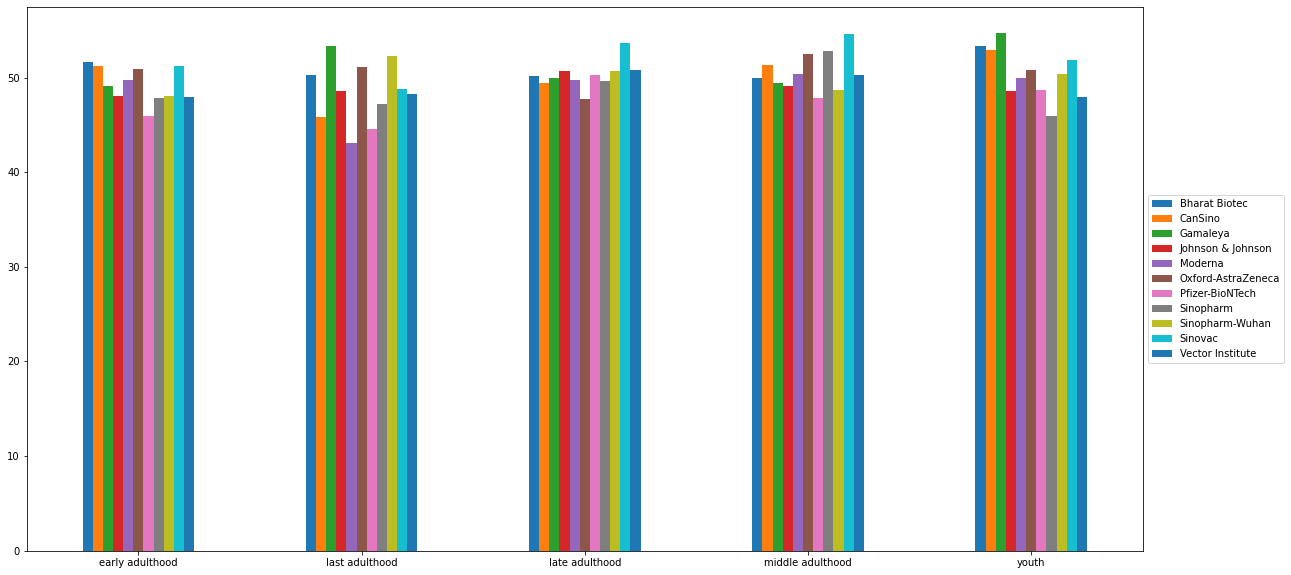

In [8]:
index=[]
data=[]
for age_category in df_groupped.age_category.unique():
  df_filter = df_groupped[df_groupped["age_category"]==age_category]
  index.append(age_category)
  final_row={}
  for _, row in df_filter.iterrows():
    final_row[row["vaccine"]]=row["reaction mean"]
  data.append(final_row)

df_to_plot = pd.DataFrame(data,index=index)
axes_1 = df_to_plot.plot.bar(rot=0, figsize=(20,10))
axes_1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [13]:
l=[]
for age_category in df_groupped.age_category.unique():
  best,value=None,float('inf')
  df_filter = df_groupped[df_groupped["age_category"]==age_category]
  for index, row in df_filter.iterrows():
    if row["reaction mean"]<value:
      best=row
      value=row["reaction mean"]

  l.append(best)

pd.DataFrame(l,index=range(len(l)))

,vaccine,age_category,reaction mean,reaction std
0,Pfizer-BioNTech,early adulthood,45.934498,28.533915
1,Moderna,last adulthood,43.048544,28.510878
2,Oxford-AstraZeneca,late adulthood,47.764706,28.941930
3,Pfizer-BioNTech,middle adulthood,47.793103,28.589040
4,Sinopharm,youth,45.931034,29.044424
